# Mercadolibre´s Tweets Sentiment Analysis with Natural Language Processing

Some time ago I created a natural language processing model with tweets from an airline company account that predicts whether a tweet has a positive or negative sentiment. It can be found in my github repo [here](https://github.com/leonelBianchi/NLP-Model-in-Twitter). To take advantage of it, I am going to import the function of this model and apply it to the Twitter mentions of Mercado libre, particularly @ML_Ayuda account that is used to make claims. But that model was trained with tweets in english and Mercadolibre´s account is in spanish. Because of that, I used the same model as before but now the dataset is in spanish (can be found from the same source). 

However, this would not be entirely correct, since the model was trained with tweets from an airline company customers mentions and now we are using it for a data sample of an ecommerce company. But, you will see that in language there are some exclamations that are repeated everywhere, so the learning can be used in other situations. Anyway, let's try it.

## Importing packages

In [23]:
import pandas as pd
import numpy as np

from ipynb.fs.full.nlp_model import text_classification # import the natural language processing model

## Importing datasets

Import tweets from @ML_Ayuda and clean it.

In [14]:
df = pd.read_csv("_dataframes/df_ayuda_clean.csv")
df = df[["text", "hour"]]
df["text"] = df["text"].str.replace("@ML_Ayuda", '')

df["text"] = df["text"].str.replace("[^0-9a-zA-Z ]+"," ")
df["text"] = df["text"].str.lower()

df.head(5)

,text,hour
0,expl came si lo puedo devolver y si me implica alg n costo a m me hubiera conformado con calificar pero ni eso me dejan,16
1,buen d a compro normalmente con dos cuit pero mi perfil alfi61 tiene un solo cuit y me crea problemas a l https t co yeasmwhs6k,16
2,la cuesti n como saben cual es mi cuentas existen miles de edgar,16
3,necesito aclarar algunos pagos que cargaron a mi tarjeta de credito en chile,16
4,katiapalomadelacruzlapoint operaci n 13258769682 tu reclamo n 5056925568,16


## Predictions

Here I apply the text_classification function (developed in nlp_model.py file) for each tweet. Then, I create a new column with this data.

In [15]:
sentiment = [text_classification(df["text"][tweet]) for tweet in range(0, len(df))]

In [16]:
df["Sentiment"] = sentiment

In [22]:
df.head(8)

,text,hour,Sentiment
0,expl came si lo puedo devolver y si me implica alg n costo a m me hubiera conformado con calificar pero ni eso me dejan,16,Negative
1,buen d a compro normalmente con dos cuit pero mi perfil alfi61 tiene un solo cuit y me crea problemas a l https t co yeasmwhs6k,16,Negative
2,la cuesti n como saben cual es mi cuentas existen miles de edgar,16,Negative
3,necesito aclarar algunos pagos que cargaron a mi tarjeta de credito en chile,16,Negative
4,katiapalomadelacruzlapoint operaci n 13258769682 tu reclamo n 5056925568,16,Negative
5,me figura tu clave venci contin o y me env a un supuesto c digo que nunca llega es comercial la cuenta https t co fcovf0qxrl,16,Negative
6,atencionprofeco mercadolibre mercadopagomex concilianet profeco ya la present desde el d a 4 de feb https t co 8uxesxn3fr,16,Negative
7,significa que regresan el dinero a mi tarjeta o que hacen el pago al vendedor,16,Negative


## Quick View

#### Positive and negatives tweets analysis

In [20]:
df[df["Sentiment"] == "Negative"].head(8)

,text,hour,Sentiment
0,expl came si lo puedo devolver y si me implica alg n costo a m me hubiera conformado con calificar pero ni eso me dejan,16,Negative
1,buen d a compro normalmente con dos cuit pero mi perfil alfi61 tiene un solo cuit y me crea problemas a l https t co yeasmwhs6k,16,Negative
2,la cuesti n como saben cual es mi cuentas existen miles de edgar,16,Negative
3,necesito aclarar algunos pagos que cargaron a mi tarjeta de credito en chile,16,Negative
4,katiapalomadelacruzlapoint operaci n 13258769682 tu reclamo n 5056925568,16,Negative
5,me figura tu clave venci contin o y me env a un supuesto c digo que nunca llega es comercial la cuenta https t co fcovf0qxrl,16,Negative
6,atencionprofeco mercadolibre mercadopagomex concilianet profeco ya la present desde el d a 4 de feb https t co 8uxesxn3fr,16,Negative
7,significa que regresan el dinero a mi tarjeta o que hacen el pago al vendedor,16,Negative


In [21]:
df[df["Sentiment"] == "Positive"].head(8)

,text,hour,Sentiment
20,https t co 3glrvw9u9i,16,Positive
21,https t co bmdzggjuob,16,Positive
61,gracias espero pronto respuesta,15,Positive
106,https t co 5lmjx1nsy5,13,Positive
112,vale muchas gracias,13,Positive
157,fran44007 mercadolibre kyc,4,Positive
167,porque sucede esto https t co o3no90d2m5,3,Positive
177,consulta 94470449,2,Positive


In general terms, we can see that negative tweets use "No" or "Nunca" a lot of time, while positives they tend to be neutral or showing appreciation for something, saying "Gracias", or somehthing like that. This shows a very good performance. Now lets see the proportion of each sentiment:

In [9]:
print("Positives: ", len(df[df["Sentiment"] == "Positive"])/ len(df))
print("Negatives: ", len(df[df["Sentiment"] == "Negative"])/ len(df))

Positives:  0.0624
Negatives:  0.9376


I did not expect anything else, mentions are usually to complain about something or criticize. **It is very good to see that the tweets where you thank or say hello are classified as positive and those where a complaint is made as negative, even having used a model made with a dataset from an airline company, being that Mercadolibre belongs to another area like e-commerce. This shows that we can borrow learning from another model, having a much better parameter initialization and reducing training time. However, we didn´t do that here, we used the model as it was, working well at identifying language exclamations that are common everywhere.**

#### Hour with most twitter activity

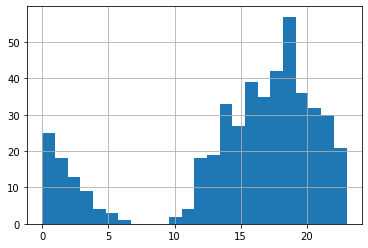

In [30]:
df[df["Sentiment"] == "Positive"]["hour"].hist(bins=24)

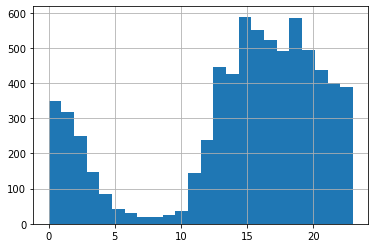

In [29]:
df[df["Sentiment"] == "Negative"]["hour"].hist(bins=24)

We can see that the distribution is the same for both sentiments. Most people tweet between 3 p.m. and 8 p.m. 
